T2 values >= 100:  26790
T2 values < 100:  68708
Is Sum of arrays = Total T2 values: True


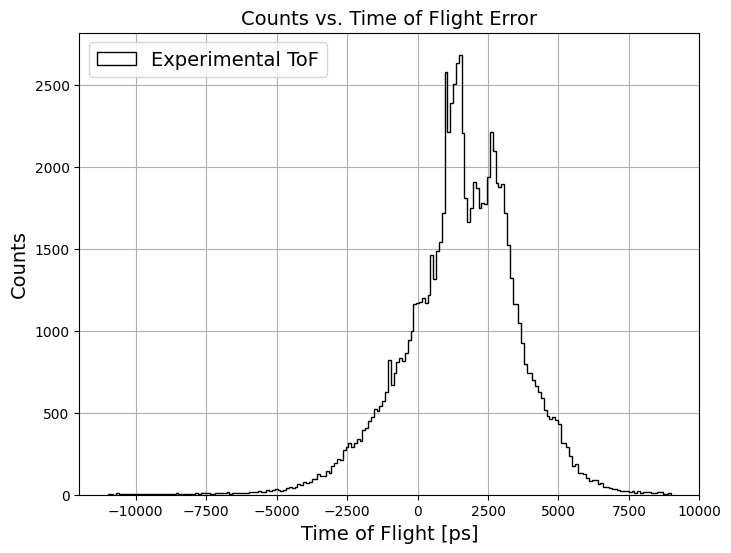

In [2]:
""" Attempt 1:  Plotting T2 & ToF """

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# LOAD DATA
df = pd.read_csv("T2_ToFAnalysis_07_24_2023.csv")
df.dropna(axis="columns", inplace=True)

# load dataframe variables
tof = df["tof"]
t2 = df["pulse_t2"]

values_above_100 = t2[t2 >= 100]
values_below_100 = t2[t2 < 100]

print("T2 values >= 100: ", len(values_above_100))
print("T2 values < 100: ", len(values_below_100))
print("Is Sum of arrays = Total T2 values:", (len(values_above_100)+len(values_below_100)) ==len(t2))

x_data = np.linspace(-11000,9000,200) # what? why
fig0, ax0 = plt.subplots()
fig0.set_size_inches(8,6)
ax0.hist(tof,bins=x_data, histtype='step', facecolor='none', edgecolor='k', label='Experimental ToF')

ax0.set_title('Counts vs. Time of Flight Error', fontsize=14)
ax0.set_xlabel('Time of Flight [ps]', fontsize=14)
ax0.set_ylabel('Counts', fontsize=14)
ax0.grid()
ax0.legend(loc='best', fontsize=14)
plt.show()

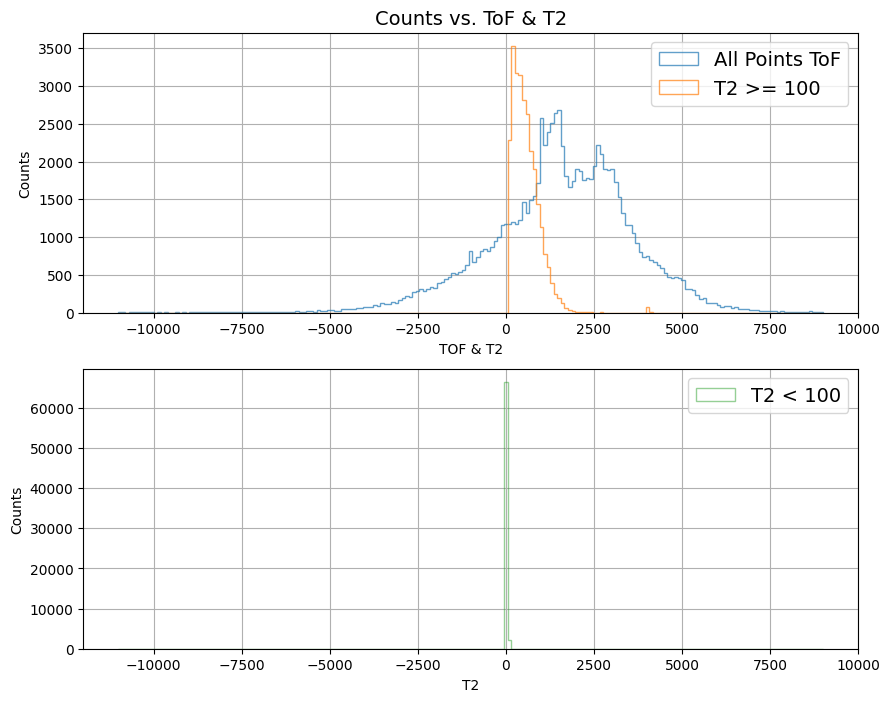

In [96]:
x_data = np.linspace(-11000,9000,200)
fig1,ax1 = plt.subplots(2,1)
fig1.set_size_inches(10, 8)
ax1[0].hist(tof, 
         bins=x_data, 
         histtype='step',
         alpha=0.7, 
         facecolor='none',
         color ='C0',
        #  edgecolor='k',
         label='All Points ToF')
ax1[0].hist(values_above_100, 
         bins=x_data, 
         histtype='step',
         alpha=0.7,
         facecolor='none', 
         color = 'C1',
        #  edgecolor='k',
         label='T2 >= 100')
ax1[1].hist(values_below_100, 
         bins= x_data, 
         histtype='step',
         alpha=0.5, 
         facecolor='none',
         color = 'C2',
        #  edgecolor='k',
         label='T2 < 100')
ax1[0].set_xlabel('TOF & T2')
ax1[1].set_xlabel('T2')
ax1[0].set_ylabel('Counts')
ax1[1].set_ylabel('Counts')
ax1[0].set_title('Counts vs. ToF & T2', fontsize =14)
ax1[0].grid()
ax1[1].grid()
ax1[0].legend(loc='best', fontsize=14)
ax1[1].legend(loc='best', fontsize=14)
plt.show()

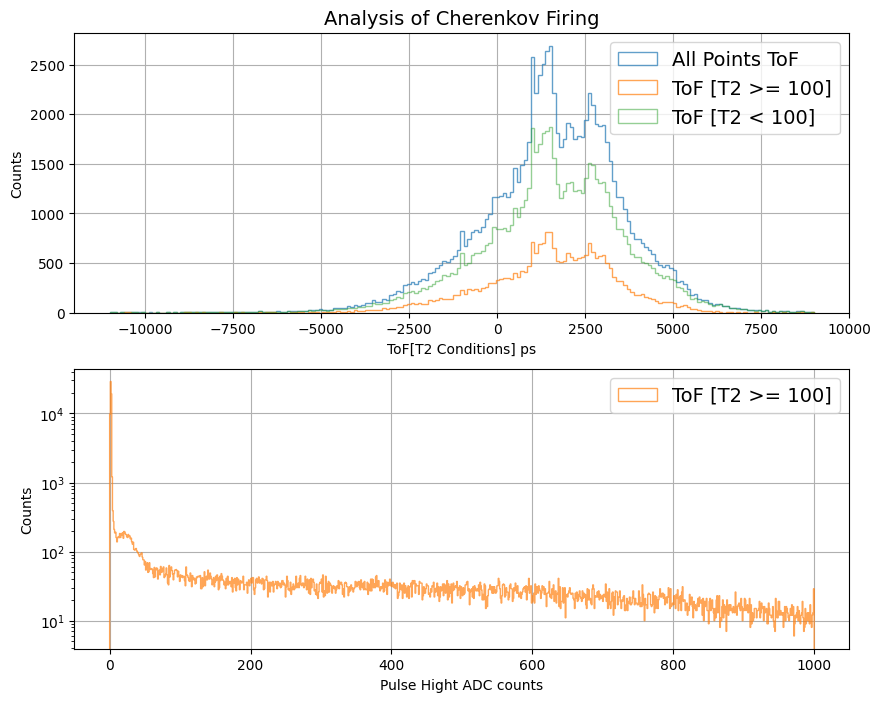

In [28]:
""" Attempt 2 """

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# LOAD DATA
df = pd.read_csv("T2_ToFAnalysis_07_24_2023.csv")
df.dropna(axis="columns", inplace=True)

# load dataframe variables
tof = df["tof"]
t2 = df["pulse_t2"]

# values_above_100 = t2[t2 >= 100]
# values_below_100 = t2[t2 < 100]

tof_t2_above_100 = tof[t2 >= 100]
tof_t2_below_100 = tof[t2 < 100]


x_data = np.linspace(-11000,9000,200)

fig,ax1 = plt.subplots(2,1)
fig.set_size_inches(10, 8)
ax1[0].hist(tof, 
         bins=x_data, 
         histtype='step',
         alpha=0.7, 
         facecolor='none',
         color ='C0',
        #  edgecolor='k',
         label='All Points ToF')
ax1[0].hist(tof_t2_above_100, 
         bins=x_data, 
         histtype='step',
         alpha=0.7,
         facecolor='none', 
         color = 'C1',
        #  edgecolor='k',
         label='ToF [T2 >= 100]')
ax1[0].hist(tof_t2_below_100, 
         bins= x_data, 
         histtype='step',
         alpha=0.5, 
         facecolor='none',
         color = 'C2',
        #  edgecolor='k',
         label='ToF [T2 < 100]')
ax1[1].hist(t2, 
         bins=np.linspace(0,1000,1000), 
         histtype='step',
         alpha=0.7,
         facecolor='none',
         color = 'C1',
        #  edgecolor='k',
         label='ToF [T2 >= 100]')
# ax1[1].hist(tof_t2_below_100, 
#          bins= x_data, 
#          histtype='step',
#          alpha=0.5, 
#          facecolor='none',
#          color = 'C2',
#         #  edgecolor='k',
#          label='TgioF [T2 < 100]')
ax1[0].set_xlabel('ToF[T2 Conditions] ps')
ax1[1].set_xlabel('Pulse Hight ADC counts')
ax1[0].set_ylabel('Counts')
ax1[1].set_ylabel('Counts')
ax1[1].set_yscale('log')
ax1[0].set_title('Analysis of Cherenkov Firing', fontsize =14)
ax1[0].grid()
ax1[1].grid()
ax1[0].legend(loc='best', fontsize=14)
ax1[1].legend(loc='best', fontsize=14)
plt.show()
# send to liam 
fig.savefig('tof_t2_plot.png', bbox_inches="tight")


In [14]:
print(tof_t2_above_100[0:5])
print(tof[0:5])
print(t2[0:5])

0     2830
15    2240
18    1600
20    2420
21    1190
Name: tof, dtype: int64
0    2830
1     180
2   -1190
3   -1030
4      10
Name: tof, dtype: int64
0    4095
1       2
2       2
3       0
4       2
Name: pulse_t2, dtype: int64
